Uploading Kaggle.json Api Token in collab


In [2]:
from google.colab import files
files.upload()  # Upload your kaggle.json API token
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


Downloading Kaggle dogs-vs-cat Dataset

In [3]:
!kaggle competitions download -c dogs-vs-cats
!unzip -q dogs-vs-cats.zip -d dogs-vs-cats


100% 809M/812M [00:15<00:00, 59.9MB/s]
100% 812M/812M [00:15<00:00, 56.5MB/s]


Importing Required Libraries

In [2]:
import zipfile
import os
import shutil
import numpy as np
import cv2
from skimage.io import imread
from skimage.transform import resize
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


Splitting A 25,000 images of Cat and Dog Images into two seperate folder named as Cat and Dog Contaning 12,500 images of both respectively

In [5]:

# Path to the downloaded ZIP file
zip_file_path = '/content/dogs-vs-cats/train.zip'  # Adjust this path as per your setup
extract_path = '/content/cat-and-dog'  # Define the path where you want to extract the ZIP file

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Define paths for the new folders
train_folder_path = os.path.join(extract_path, 'train')  # Assuming the extracted folder name is 'train'
cat_folder_path = os.path.join(train_folder_path, 'Cat')
dog_folder_path = os.path.join(train_folder_path, 'Dog')

# Create the Cat and Dog folders if they don't exist
os.makedirs(cat_folder_path, exist_ok=True)
os.makedirs(dog_folder_path, exist_ok=True)

# Function to move images with a specified limit
def move_images_with_limit(source_folder, cat_dest_folder, dog_dest_folder, limit):
    cat_count = 0
    dog_count = 0
    for filename in os.listdir(source_folder):
        # Construct full file path
        file_path = os.path.join(source_folder, filename)

        # Check if it is a file and not a directory
        if os.path.isfile(file_path):
            # Determine if the file is a cat or dog image and move it accordingly
            if 'cat' in filename.lower() and cat_count < limit:
                shutil.move(file_path, os.path.join(cat_dest_folder, filename))
                cat_count += 1
            elif 'dog' in filename.lower() and dog_count < limit:
                shutil.move(file_path, os.path.join(dog_dest_folder, filename))
                dog_count += 1

        # Break the loop if the limit is reached for both categories
        if cat_count >= limit and dog_count >= limit:
            break

# Move 12500 cat images to 'Cat' folder and 12500 dog images to 'Dog' folder
move_images_with_limit(train_folder_path, cat_folder_path, dog_folder_path, 12500)

print('12500 cat images and 12500 dog images have been moved to Cat and Dog folders respectively.')

12500 cat images and 12500 dog images have been moved to Cat and Dog folders respectively.


Image Preprocessing
* splitting Data/images and their labels(1---> Dog and 0---->Cat)
* resizing images into (50x50)
* finally append them into respective lists i,e Data and labels

In [3]:
input_dir = '/content/cat-and-dog/train'
categories = ['Cat','Dog']
data = []
labels = []
for category_idx,category in enumerate(categories):
  for file in os.listdir(os.path.join(input_dir,category)):
    img_path = os.path.join(input_dir,category,file)
    print(img_path)
    img = imread(img_path)
    img = resize(img,(50,50))
    data.append(img.flatten())
    labels.append(category_idx)



Streaming output truncated to the last 5000 lines.
/content/cat-and-dog/train/Dog/dog.11341.jpg
/content/cat-and-dog/train/Dog/dog.10273.jpg
/content/cat-and-dog/train/Dog/dog.8630.jpg
/content/cat-and-dog/train/Dog/dog.5127.jpg
/content/cat-and-dog/train/Dog/dog.10703.jpg
/content/cat-and-dog/train/Dog/dog.1712.jpg
/content/cat-and-dog/train/Dog/dog.11287.jpg
/content/cat-and-dog/train/Dog/dog.3238.jpg
/content/cat-and-dog/train/Dog/dog.12454.jpg
/content/cat-and-dog/train/Dog/dog.2802.jpg
/content/cat-and-dog/train/Dog/dog.10155.jpg
/content/cat-and-dog/train/Dog/dog.6075.jpg
/content/cat-and-dog/train/Dog/dog.1780.jpg
/content/cat-and-dog/train/Dog/dog.10931.jpg
/content/cat-and-dog/train/Dog/dog.10609.jpg
/content/cat-and-dog/train/Dog/dog.8911.jpg
/content/cat-and-dog/train/Dog/dog.10147.jpg
/content/cat-and-dog/train/Dog/dog.3391.jpg
/content/cat-and-dog/train/Dog/dog.11994.jpg
/content/cat-and-dog/train/Dog/dog.3635.jpg
/content/cat-and-dog/train/Dog/dog.11692.jpg
/content/cat-a

Converting Lists into numpy arrays

In [4]:
data = np.array(data)
labels = np.array(labels)

In [5]:
labels[labels==0].shape

(12500,)

In [6]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [7]:
labels[labels==1].shape

(12500,)

Splitting Data and labels into traning and testing sets as x_train,x_test,y_train and y_test

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

Loaing and training the model(svm) on training set

In [9]:
svm_model = SVC(kernel='rbf')
svm_model.fit(x_train, y_train)

SVC()

Make prediction using x_test

In [10]:
y_pred = svm_model.predict(x_test)

Estimating accuracy if Model

In [11]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6846


Function to Display Results

In [30]:
import matplotlib.pyplot as plt

def visualize_results(x_test, y_test, y_pred, categories, num_images=5):
    correct_indices = [i for i in range(len(y_test)) if y_test[i] == y_pred[i]]

    if len(correct_indices) < num_images:
        num_images = len(correct_indices)

    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, ax in enumerate(axes):
        index = correct_indices[i]
        img = x_test[index].reshape(50, 50, 3)  # Adjust based on your image shape
        ax.imshow(img, cmap='gray')
        ax.set_title(f"Predicted: {categories[y_pred[index]]}\nActual: {categories[y_test[index]]}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Results

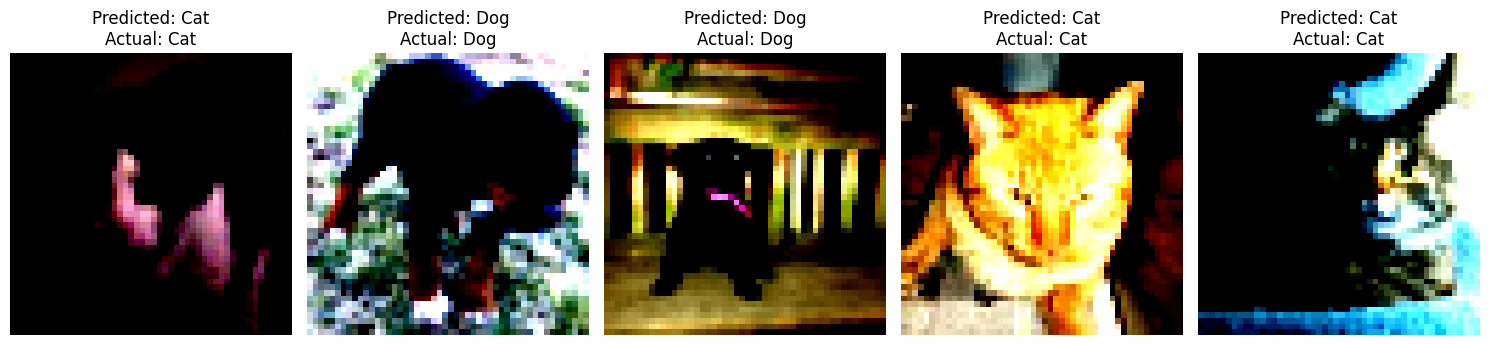

In [31]:
visualize_results(x_test, y_test, y_pred, categories)